In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38', '#0072bc', '#F15a22', '#da6fab']
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
sns.set_style('white')

In [3]:
df_raw=pd.read_csv('../summary_data/cdr3_perSample.csv')
df_raw.head()

,File_Name,site,tissue,type,cdr3
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF


In [4]:
df_meta=pd.read_csv('../summary_data/perSample_allChains_aditionalPhenotypes.csv')
df_meta.head()

,File_Name,tissue,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,sample_x,tissue.1,histological site.1,nCDR3_IGK,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,1,0.086406,-0.000000,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,6,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,1,0.072324,-0.000000,G64389.GTEX-13SLW-0326.1,Muscle - Skeletal,Muscle,8,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,637,29.723199,6.270457,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,Lung,844,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,0.000000,0.000000,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Artery - Tibial,Blood Vessel,0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,0,0.000000,0.000000,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain - Caudate (basal ganglia),Brain,3,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [5]:
df=pd.merge(df_raw,df_meta,on='File_Name')
df.head()

,File_Name,site,tissue_x,type,cdr3,tissue_y,histological site,nCDR3_IGH,nReads_IGH,Shanon_IGH,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQYDNLPITF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSFSTPRTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQSYSTPRTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CLQHYSAPHTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,Bladder,IGK,CQQRDFRVYTF,Bladder,Bladder,1,0.086406,-0.0,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [6]:
df_ligth=df.loc[:,['File_Name','submitted_subject_id_s','tissue_x','histological site','type','cdr3']].reindex()
df_ligth['cdr3_ind']=df_ligth['submitted_subject_id_s'].astype(str)+'_'+df_ligth['cdr3']
df_ligth.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC_CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC_CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC_CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC_CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC_CQQRDFRVYTF


In [7]:
df_IGK=df_ligth.loc[df_ligth['type'] == 'IGK']
df_IGK.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQYDNLPITF,GTEX-SNMC_CQQYDNLPITF
1,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSFSTPRTF,GTEX-SNMC_CQQSFSTPRTF
2,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQSYSTPRTF,GTEX-SNMC_CQQSYSTPRTF
3,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CLQHYSAPHTF,GTEX-SNMC_CLQHYSAPHTF
4,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGK,CQQRDFRVYTF,GTEX-SNMC_CQQRDFRVYTF


In [8]:
df_IGK=df_IGK[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGK_no_dublicates = df_IGK.drop_duplicates()
print ("No duplicates",df_IGK.shape)
print ("Duplicates",df_IGK_no_dublicates.shape)

No duplicates (1872707, 2)
Duplicates (1538809, 2)


In [9]:
df_IGK_no_dublicates['n_across_ind'] =  df_IGK_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGK_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
0,GTEX-SNMC,CQQYDNLPITF,360
1,GTEX-SNMC,CQQSFSTPRTF,242
2,GTEX-SNMC,CQQSYSTPRTF,449
3,GTEX-SNMC,CLQHYSAPHTF,1
4,GTEX-SNMC,CQQRDFRVYTF,1


In [10]:
df_IGK['n_across_samples'] =  df_IGK.groupby('cdr3')['cdr3'].transform('size')
df_IGK.head()

,submitted_subject_id_s,cdr3,n_across_samples
0,GTEX-SNMC,CQQYDNLPITF,791
1,GTEX-SNMC,CQQSFSTPRTF,396
2,GTEX-SNMC,CQQSYSTPRTF,1473
3,GTEX-SNMC,CLQHYSAPHTF,1
4,GTEX-SNMC,CQQRDFRVYTF,1


In [11]:
df_IGK_final=pd.merge(df_IGK,df_IGK_no_dublicates,on='cdr3')
df_IGK_final=df_IGK_final[['cdr3','n_across_samples','n_across_ind']]
df_IGK_final=df_IGK_final.drop_duplicates()
df_IGK_final['n_across_tissues']=df_IGK_final['n_across_samples']-df_IGK_final['n_across_ind']
df_IGK_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CQQYDNLPITF,791,360,431
284760,CQQSFSTPRTF,396,242,154
380592,CQQSYSTPRTF,1473,449,1024
1041969,CLQHYSAPHTF,1,1,0
1041970,CQQRDFRVYTF,1,1,0


In [12]:
df_IGL=df_ligth.loc[df_ligth['type'] == 'IGL']
df_IGL.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
6,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CVLYMGSGISVF,GTEX-SNMC_CVLYMGSGISVF
7,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CCSYAGDGTYVF,GTEX-SNMC_CCSYAGDGTYVF
8,G35168.GTEX-SNMC-0826-SM-4DM66.1,GTEX-SNMC,Bladder,Bladder,IGL,CCSYAGPYTFVF,GTEX-SNMC_CCSYAGPYTFVF
677,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGL,CAAWDNTLRGVF,GTEX-SIU7_CAAWDNTLRGVF
678,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGL,CCSYEGSNTLVF,GTEX-SIU7_CCSYEGSNTLVF


In [13]:
df_IGL=df_IGL[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGL_no_dublicates = df_IGL.drop_duplicates()
print ("No duplicates",df_IGL.shape)
print ("Duplicates",df_IGL_no_dublicates.shape)

No duplicates (596825, 2)
Duplicates (533737, 2)


In [14]:
df_IGL_no_dublicates['n_across_ind'] =  df_IGL_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGL_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
6,GTEX-SNMC,CVLYMGSGISVF,291
7,GTEX-SNMC,CCSYAGDGTYVF,11
8,GTEX-SNMC,CCSYAGPYTFVF,9
677,GTEX-SIU7,CAAWDNTLRGVF,1
678,GTEX-SIU7,CCSYEGSNTLVF,2


In [15]:
df_IGL=df_IGL[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGL_no_dublicates = df_IGL.drop_duplicates()
print ("No duplicates",df_IGL.shape)
print ("Duplicates",df_IGL_no_dublicates.shape)

No duplicates (596825, 2)
Duplicates (533737, 2)


In [16]:
df_IGL_no_dublicates['n_across_ind'] =  df_IGL_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGL_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
6,GTEX-SNMC,CVLYMGSGISVF,291
7,GTEX-SNMC,CCSYAGDGTYVF,11
8,GTEX-SNMC,CCSYAGPYTFVF,9
677,GTEX-SIU7,CAAWDNTLRGVF,1
678,GTEX-SIU7,CCSYEGSNTLVF,2


In [17]:
df_IGL['n_across_samples'] =  df_IGL.groupby('cdr3')['cdr3'].transform('size')
df_IGL.head()

,submitted_subject_id_s,cdr3,n_across_samples
6,GTEX-SNMC,CVLYMGSGISVF,585
7,GTEX-SNMC,CCSYAGDGTYVF,11
8,GTEX-SNMC,CCSYAGPYTFVF,9
677,GTEX-SIU7,CAAWDNTLRGVF,1
678,GTEX-SIU7,CCSYEGSNTLVF,2


In [18]:
df_IGL_final=pd.merge(df_IGL,df_IGL_no_dublicates,on='cdr3')
df_IGL_final=df_IGL_final[['cdr3','n_across_samples','n_across_ind']]
df_IGL_final=df_IGL_final.drop_duplicates()
df_IGL_final['n_across_tissues']=df_IGL_final['n_across_samples']-df_IGL_final['n_across_ind']
df_IGL_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CVLYMGSGISVF,585,291,294
170235,CCSYAGDGTYVF,11,11,0
170356,CCSYAGPYTFVF,9,9,0
170437,CAAWDNTLRGVF,1,1,0
170438,CCSYEGSNTLVF,2,2,0


In [19]:
df_IGH=df_ligth.loc[df_ligth['type'] == 'IGH']
df_IGH.head()

,File_Name,submitted_subject_id_s,tissue_x,histological site,type,cdr3,cdr3_ind
17,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CARLPAYINYAVDVW,GTEX-SIU7_CARLPAYINYAVDVW
18,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CAKGTAAAPTPPDHW,GTEX-SIU7_CAKGTAAAPTPPDHW
19,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CRTMGAPRESYFDVW,GTEX-SIU7_CRTMGAPRESYFDVW
20,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CATEWENEHFYFDYW,GTEX-SIU7_CATEWENEHFYFDYW
21,G26533.GTEX-SIU7-0526-SM-3NM8I.1,GTEX-SIU7,Lung,Lung,IGH,CASSLYDLRNWFGPW,GTEX-SIU7_CASSLYDLRNWFGPW


In [20]:
df_IGH=df_IGH[['submitted_subject_id_s','cdr3']]
#remove dublicates, dublicates are due to CDR3 shared across tissues 
df_IGH_no_dublicates = df_IGH.drop_duplicates()
print ("No duplicates",df_IGH.shape)
print ("Duplicates",df_IGH_no_dublicates.shape)

No duplicates (245765, 2)
Duplicates (235600, 2)


In [21]:
df_IGH_no_dublicates['n_across_ind'] = df_IGH_no_dublicates.groupby('cdr3')['cdr3'].transform('size')
df_IGH_no_dublicates.head()

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,submitted_subject_id_s,cdr3,n_across_ind
17,GTEX-SIU7,CARLPAYINYAVDVW,1
18,GTEX-SIU7,CAKGTAAAPTPPDHW,1
19,GTEX-SIU7,CRTMGAPRESYFDVW,1
20,GTEX-SIU7,CATEWENEHFYFDYW,1
21,GTEX-SIU7,CASSLYDLRNWFGPW,1


In [22]:
df_IGH['n_across_samples'] = df_IGH.groupby('cdr3')['cdr3'].transform('size')
df_IGH.head()

,submitted_subject_id_s,cdr3,n_across_samples
17,GTEX-SIU7,CARLPAYINYAVDVW,1
18,GTEX-SIU7,CAKGTAAAPTPPDHW,1
19,GTEX-SIU7,CRTMGAPRESYFDVW,1
20,GTEX-SIU7,CATEWENEHFYFDYW,1
21,GTEX-SIU7,CASSLYDLRNWFGPW,1


In [23]:
df_IGH_final=pd.merge(df_IGH,df_IGH_no_dublicates,on='cdr3')
df_IGH_final=df_IGH_final[['cdr3','n_across_samples','n_across_ind']]
df_IGH_final=df_IGH_final.drop_duplicates()
df_IGH_final['n_across_tissues']=df_IGH_final['n_across_samples']-df_IGH_final['n_across_ind']
df_IGH_final.head()

,cdr3,n_across_samples,n_across_ind,n_across_tissues
0,CARLPAYINYAVDVW,1,1,0
1,CAKGTAAAPTPPDHW,1,1,0
2,CRTMGAPRESYFDVW,1,1,0
3,CATEWENEHFYFDYW,1,1,0
4,CASSLYDLRNWFGPW,1,1,0


In [24]:
df_IGH_final['IG'] = 'IGH'
df_IGL_final['IG'] = 'IGL'
df_IGK_final['IG'] = 'IGK'
df_all_final = pd.concat([df_IGH_final, df_IGL_final, df_IGK_final]).loc[:,['n_across_ind', 'n_across_tissues', 'IG']]
df_all_final = df_all_final.groupby(by='IG').mean().reset_index()
df_all_melt = df_all_final.melt(id_vars=['IG'], value_vars=['n_across_ind', 'n_across_tissues'], 
                  var_name = 'sharing_type', value_name='average_shared')
df_all_melt

,IG,sharing_type,average_shared
0,IGH,n_across_ind,1.011602
1,IGK,n_across_ind,3.348178
2,IGL,n_across_ind,1.823620
3,IGH,n_across_tissues,0.043646
4,IGK,n_across_tissues,0.726503
5,IGL,n_across_tissues,0.215553


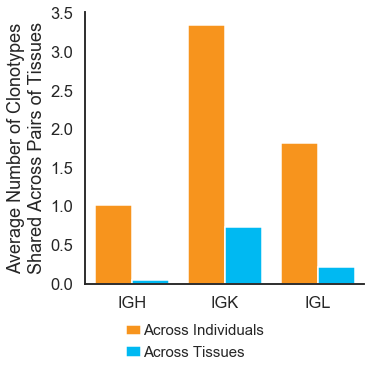

In [38]:
plt.figure(figsize=(5,5))

g=sns.barplot(data=df_all_melt, x='IG', y='average_shared', hue ='sharing_type', saturation=1)
g.set(xlabel='', ylabel='Average Number of Clonotypes\nShared Across Pairs of Tissues')
#plt.title("IGH")
handles, labels = g.get_legend_handles_labels()
plt.legend(handles, ['Across Individuals', 'Across Tissues'], bbox_to_anchor=(0.69,-0.1), 
           frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
g=sns.despine()

plt.savefig('../figures/Figure5_a.png', bbox_inches='tight')
plt.savefig('../figures/Figure5_a.pdf', bbox_inches='tight')